1) Questão 1: Implemente uma estratégia de trade automático baseado em duas médias móveis e verifique o desempenho quanto ao Índice Sharpe. Utilize um período mínimo de 3 anos e os 5 (cinco) ativos escolhidos na primeira avaliação.

In [1]:
import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

acoes = ['CMIG4','ELET3','ENBR3','USIM5','GOAU4']

def download_acao(ticker,data_inicio,data_fim):
    yf.pdr_override()       
    ticker = ticker + '.SA'
    return pdr.get_data_yahoo(ticker, 
                          start=data_inicio, 
                          end=data_fim)

/home/ricardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ricardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ricardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ricardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a 

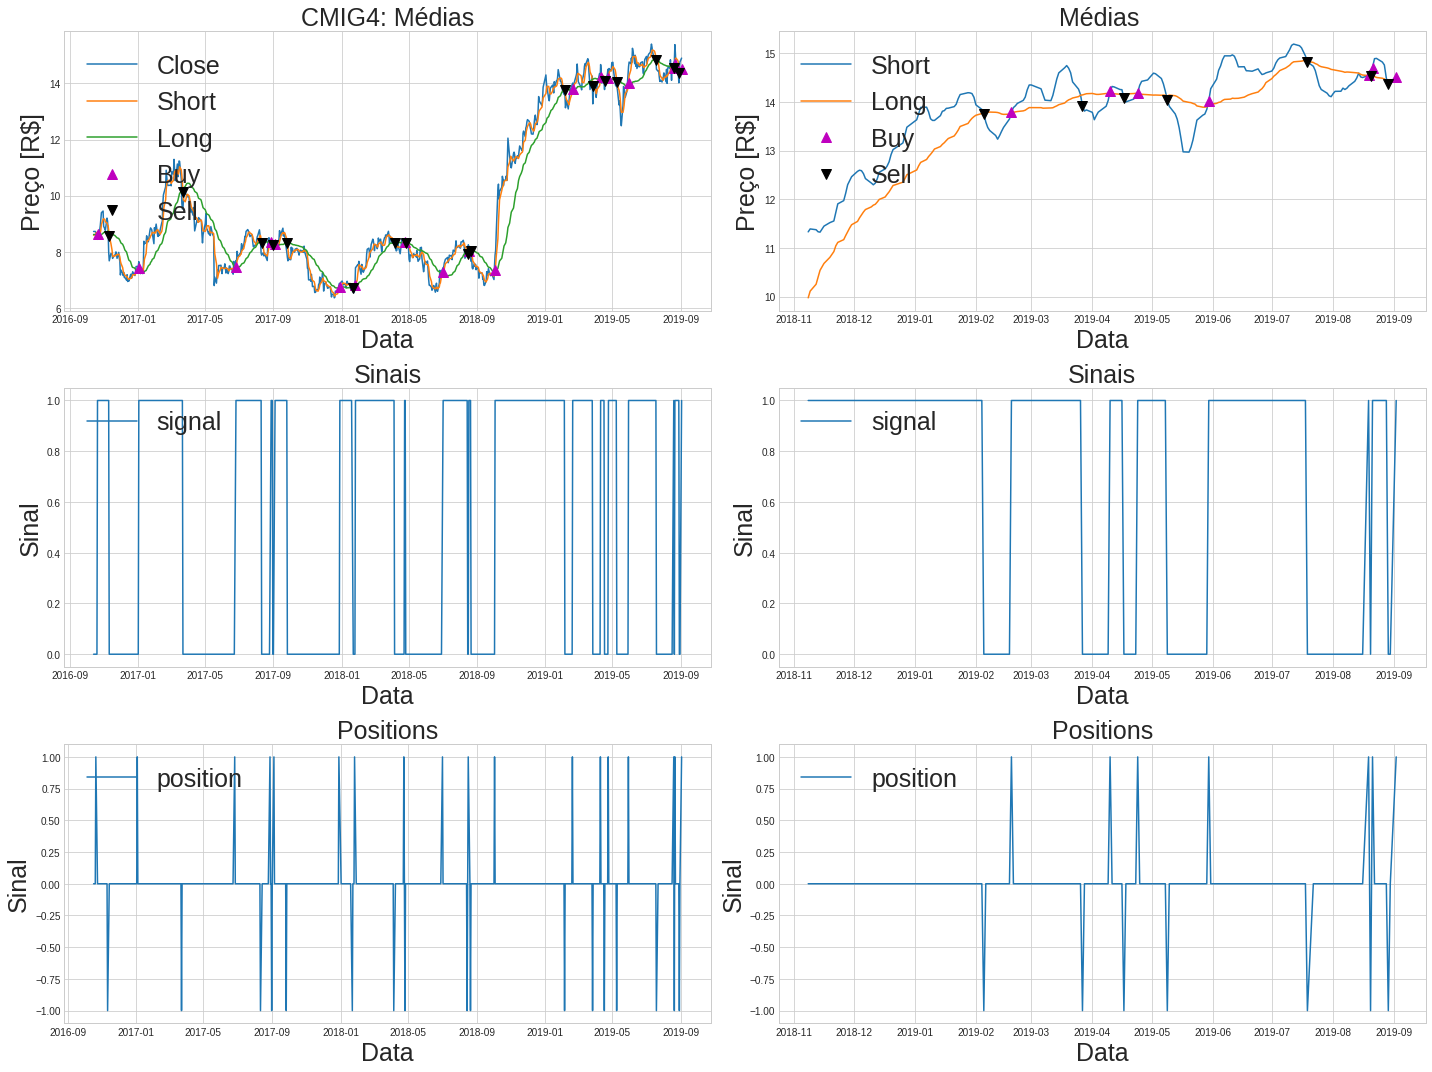

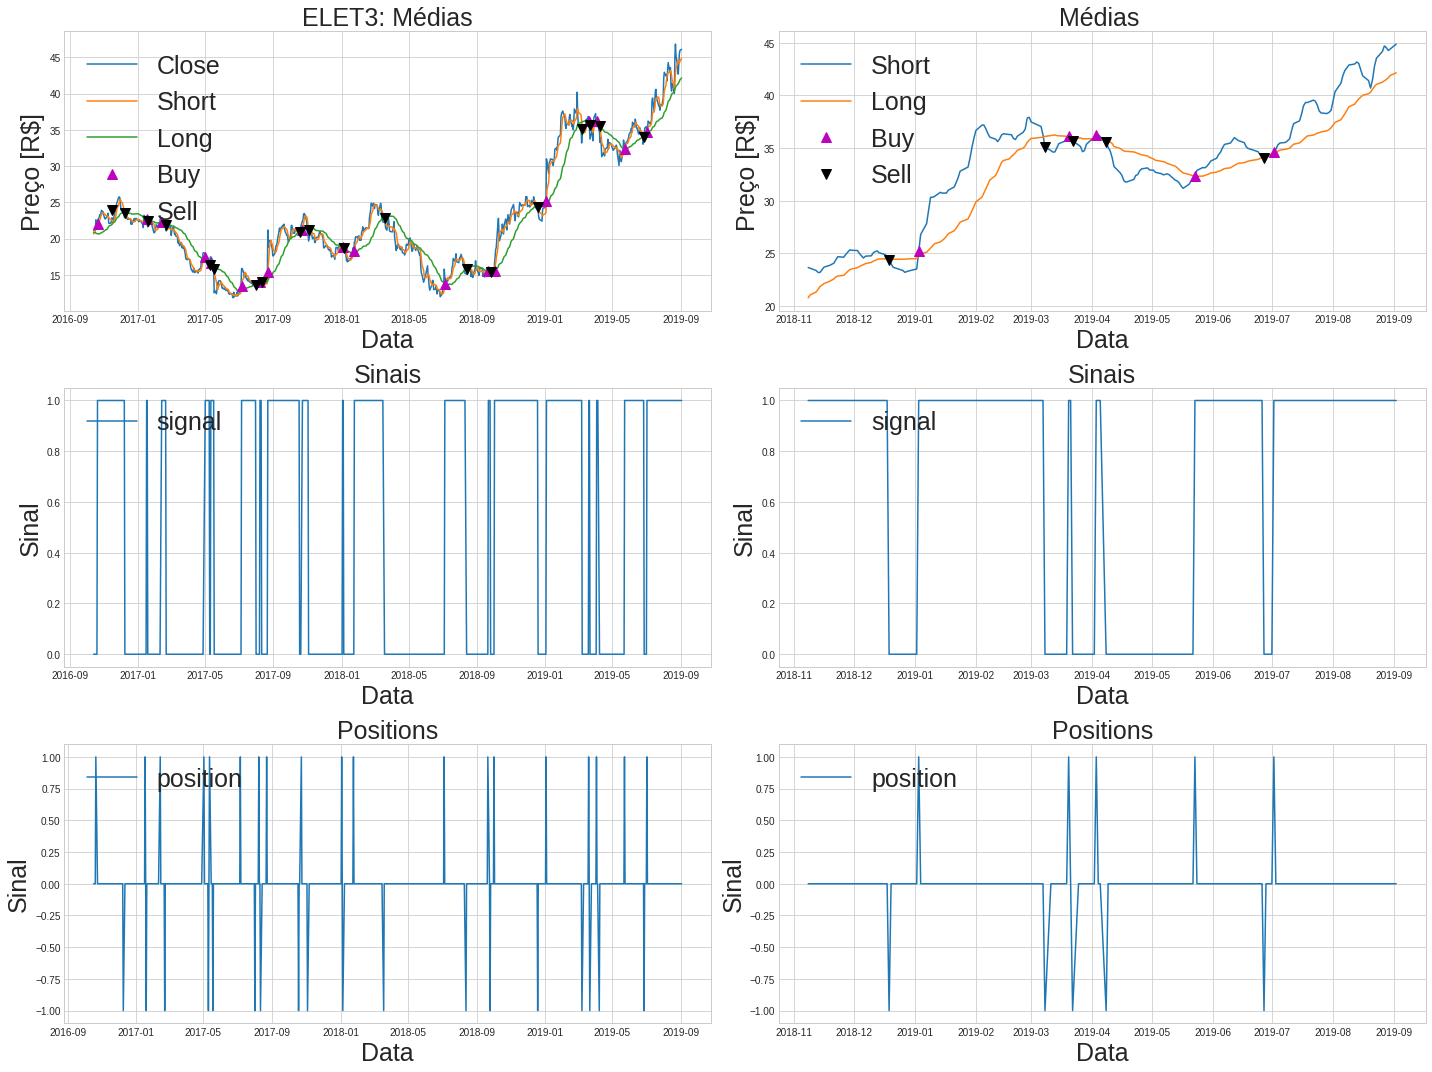

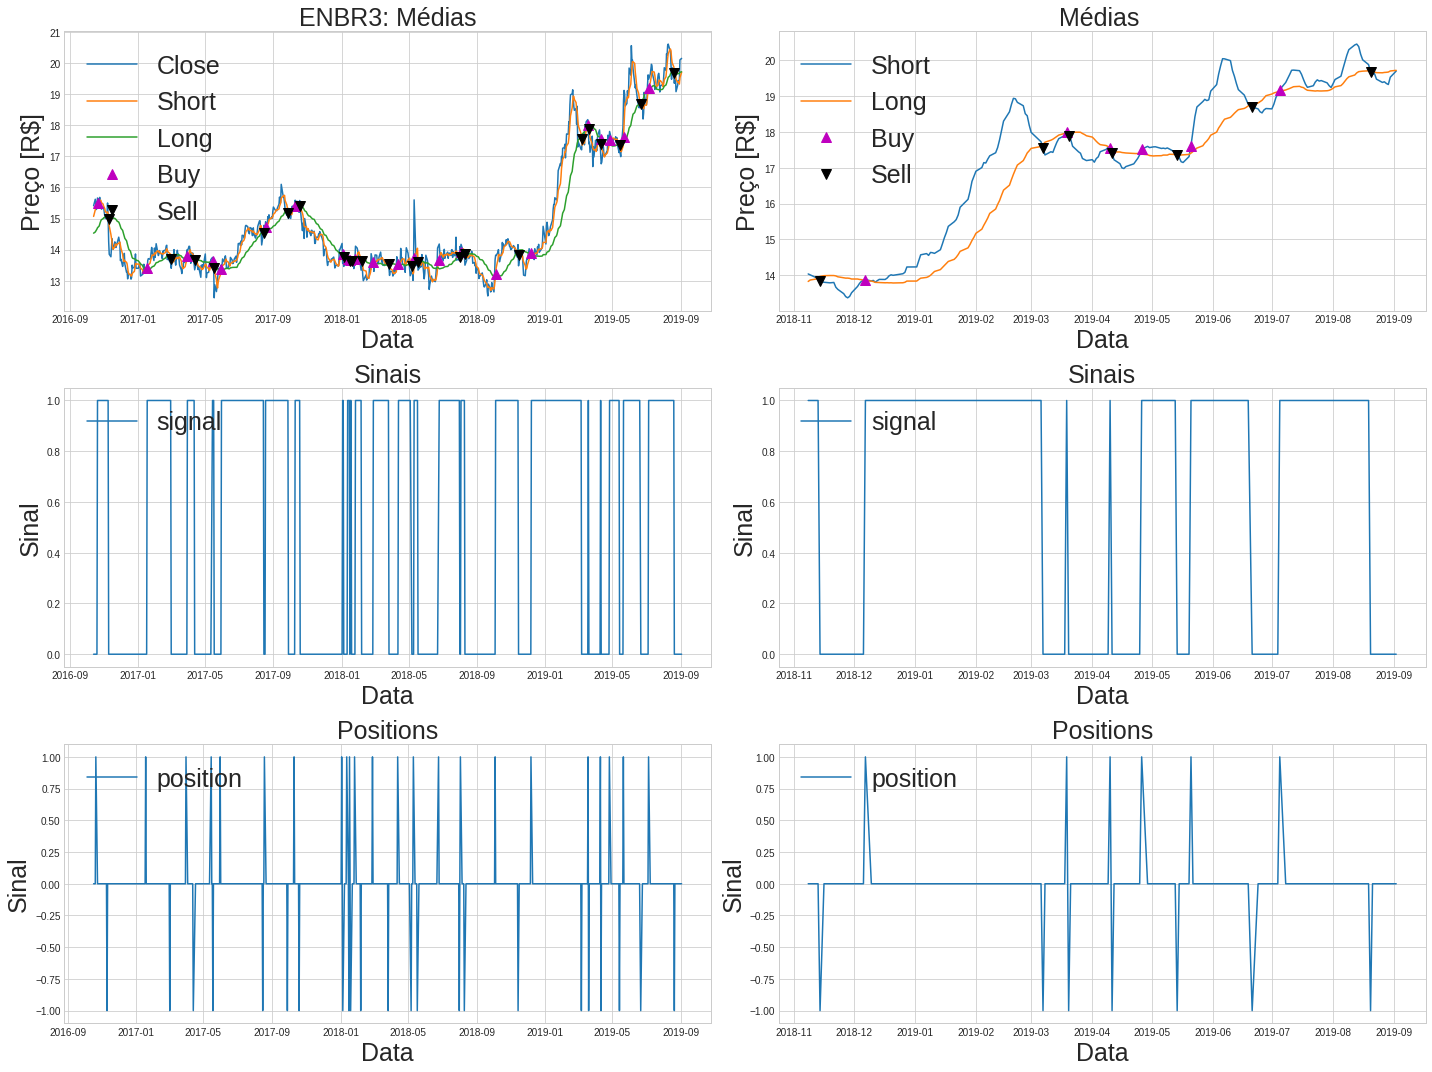

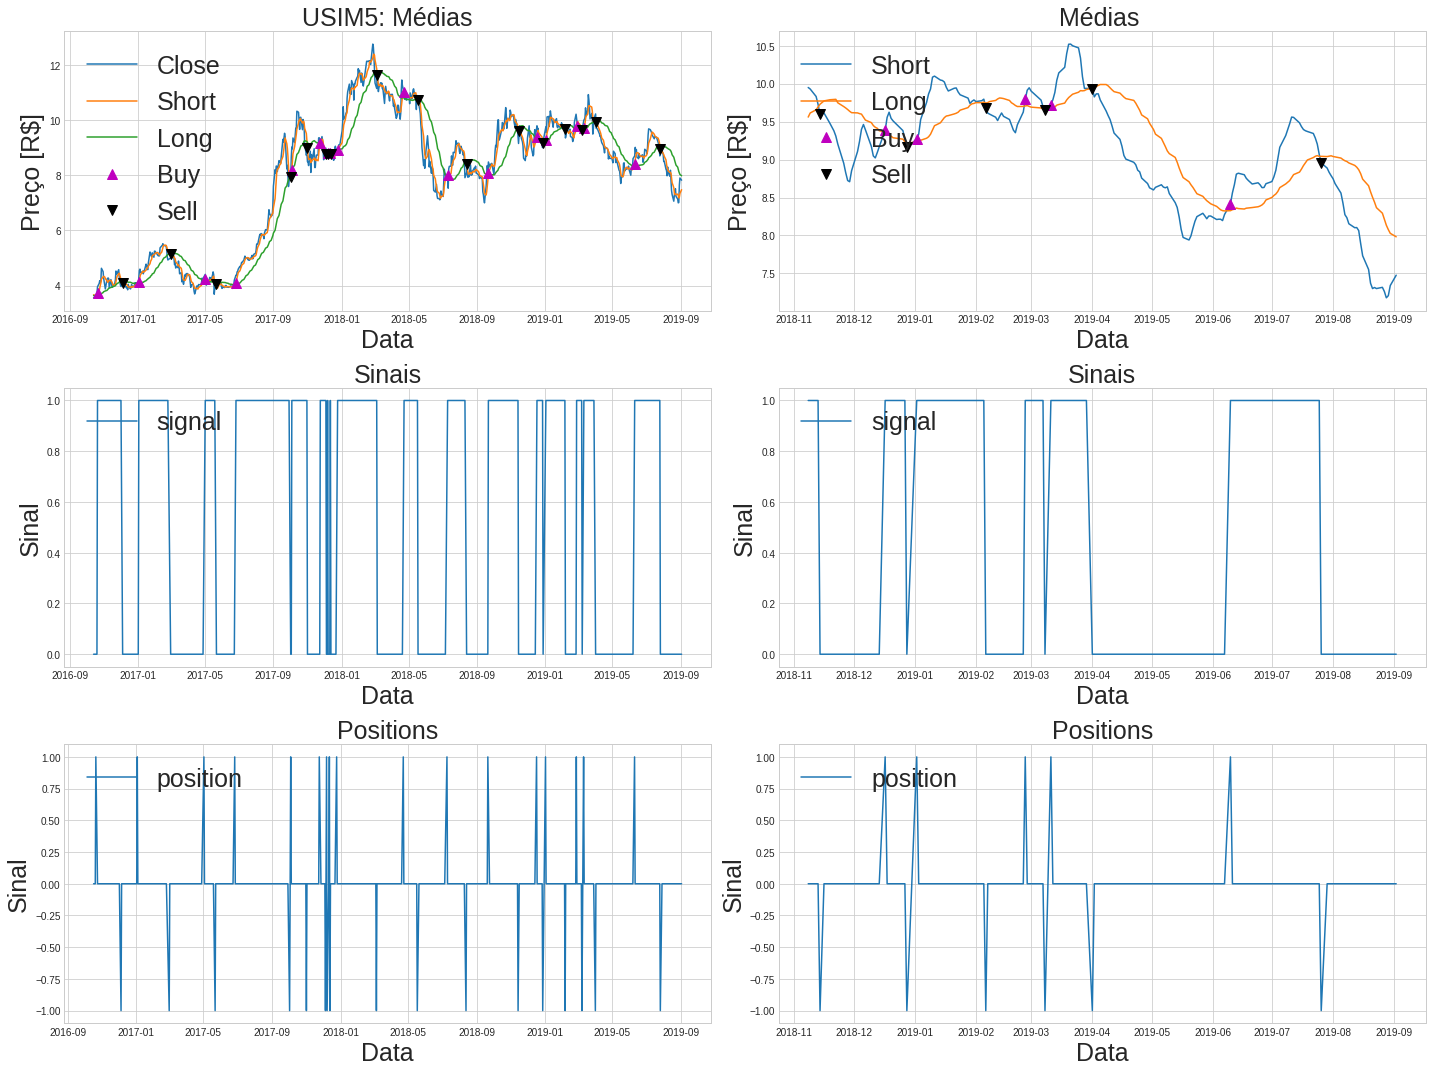

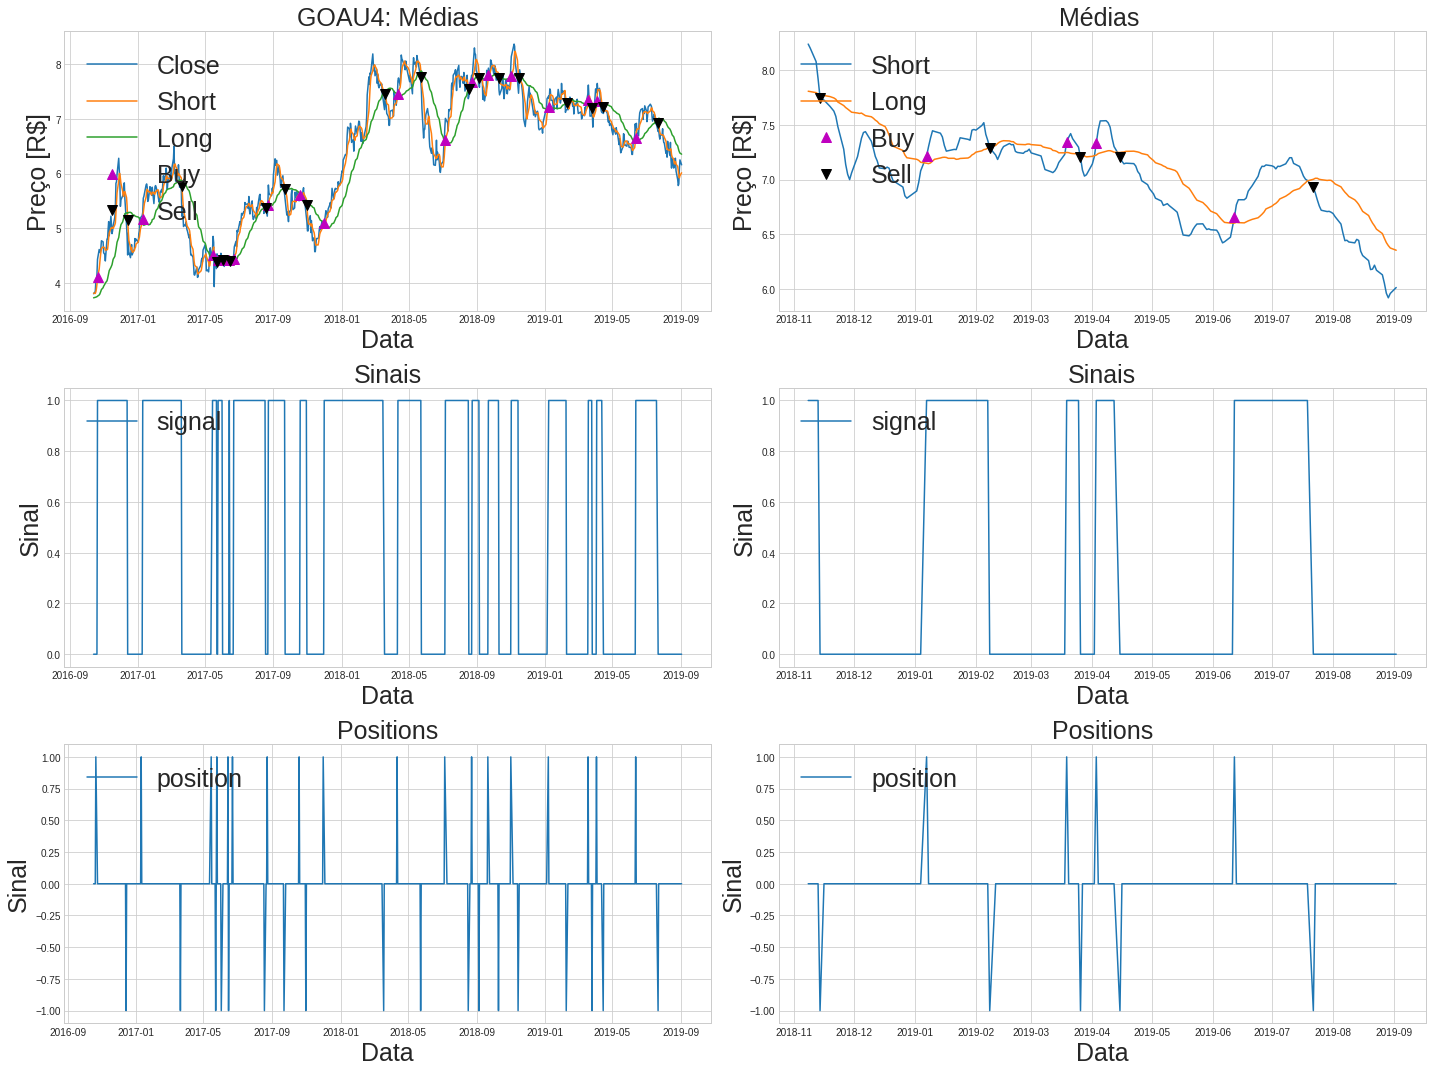

In [8]:
for acao in acoes:
    
    df = download_acao(acao,datetime.datetime(2016,9,1),datetime.datetime(2019,9,1))
    
    trades = pd.DataFrame(index=df.index)
    trades['Close']=df.Close.values

    short=5
    long=30

    trades['short'] = trades['Close'].rolling(window=short).mean()
    trades['long'] = trades['Close'].rolling(window=long).mean()
    trades.dropna(inplace = True)

    
    
    # Sinal de Entrada
    trades['signal']=0
    trades['signal'][short:] = np.where(trades['short'][short:] > trades['long'][short:], 1.0, 0.0)   

    # Posição dos trades
    trades['positions'] = trades['signal'].diff()

    fig = plt.subplots(figsize=(20,15))
    plt.style.use('seaborn-whitegrid')
    
    ax1 = plt.subplot(321)
    ax1.plot(trades['Close'], label='Close')
    ax1.plot(trades['short'], label='Short')
    ax1.plot(trades['long'],label='Long')

    ax1.plot(trades.loc[trades.positions == 1.0].index, 
             trades.short[trades.positions == 1.0],
             '^', markersize=10, color='m',label='Buy')
    ax1.plot(trades.loc[trades.positions == -1.0].index, 
             trades.short[trades.positions == -1.0],
             'v', markersize=10, color='k',label='Sell') 

    ax1.set_ylabel("Preço [R$]",fontsize=25)
    ax1.set_xlabel("Data",fontsize=25)
    ax1.set_title(acao + ": Médias",fontsize=25)
    ax1.legend(loc='upper left',fontsize=25)

    ax2 = plt.subplot(322)
    #ax2.plot(trades['Close'][-200:], label='Close')
    ax2.plot(trades['short'][-200:], label='Short')
    ax2.plot(trades['long'][-200:],label='Long')
    ax2.set_ylabel("Preço [R$]",fontsize=25)
    ax2.set_xlabel("Data",fontsize=25)
    ax2.set_title("Médias ",fontsize=25)
    ax2.plot(trades[-200:].loc[trades[-200:].positions == 1.0].index, 
             trades[-200:].short[trades[-200:].positions == 1.0],
             '^', markersize=10, color='m',label='Buy')
    ax2.plot(trades[-200:].loc[trades[-200:].positions == -1.0].index, 
             trades[-200:].short[trades[-200:].positions == -1.0],
             'v', markersize=10, color='k',label='Sell') 
    ax2.legend(loc='upper left',fontsize=25)

    ax3 = plt.subplot(323)
    ax3.plot(trades['signal'], label='signal')
    ax3.set_ylabel("Sinal",fontsize=25)
    ax3.set_xlabel("Data",fontsize=25)
    ax3.set_title("Sinais",fontsize=25)
    ax3.legend(loc='upper left',fontsize=25)

    ax4 = plt.subplot(324)
    ax4.plot(trades['signal'][-200:], label='signal')
    ax4.set_ylabel("Sinal",fontsize=25)
    ax4.set_xlabel("Data",fontsize=25)
    ax4.set_title("Sinais",fontsize=25)
    ax4.legend(loc='upper left',fontsize=25)

    ax5 = plt.subplot(325)
    ax5.plot(trades['positions'], label='position')
    ax5.set_ylabel("Sinal",fontsize=25)
    ax5.set_xlabel("Data",fontsize=25)
    ax5.set_title("Positions",fontsize=25)
    ax5.legend(loc='upper left',fontsize=25)

    ax6 = plt.subplot(326)
    ax6.plot(trades['positions'][-200:], label='position')
    ax6.set_ylabel("Sinal",fontsize=25)
    ax6.set_xlabel("Data",fontsize=25)
    ax6.set_title("Positions",fontsize=25)
    ax6.legend(loc='upper left',fontsize=25)
    
    plt.tight_layout() 


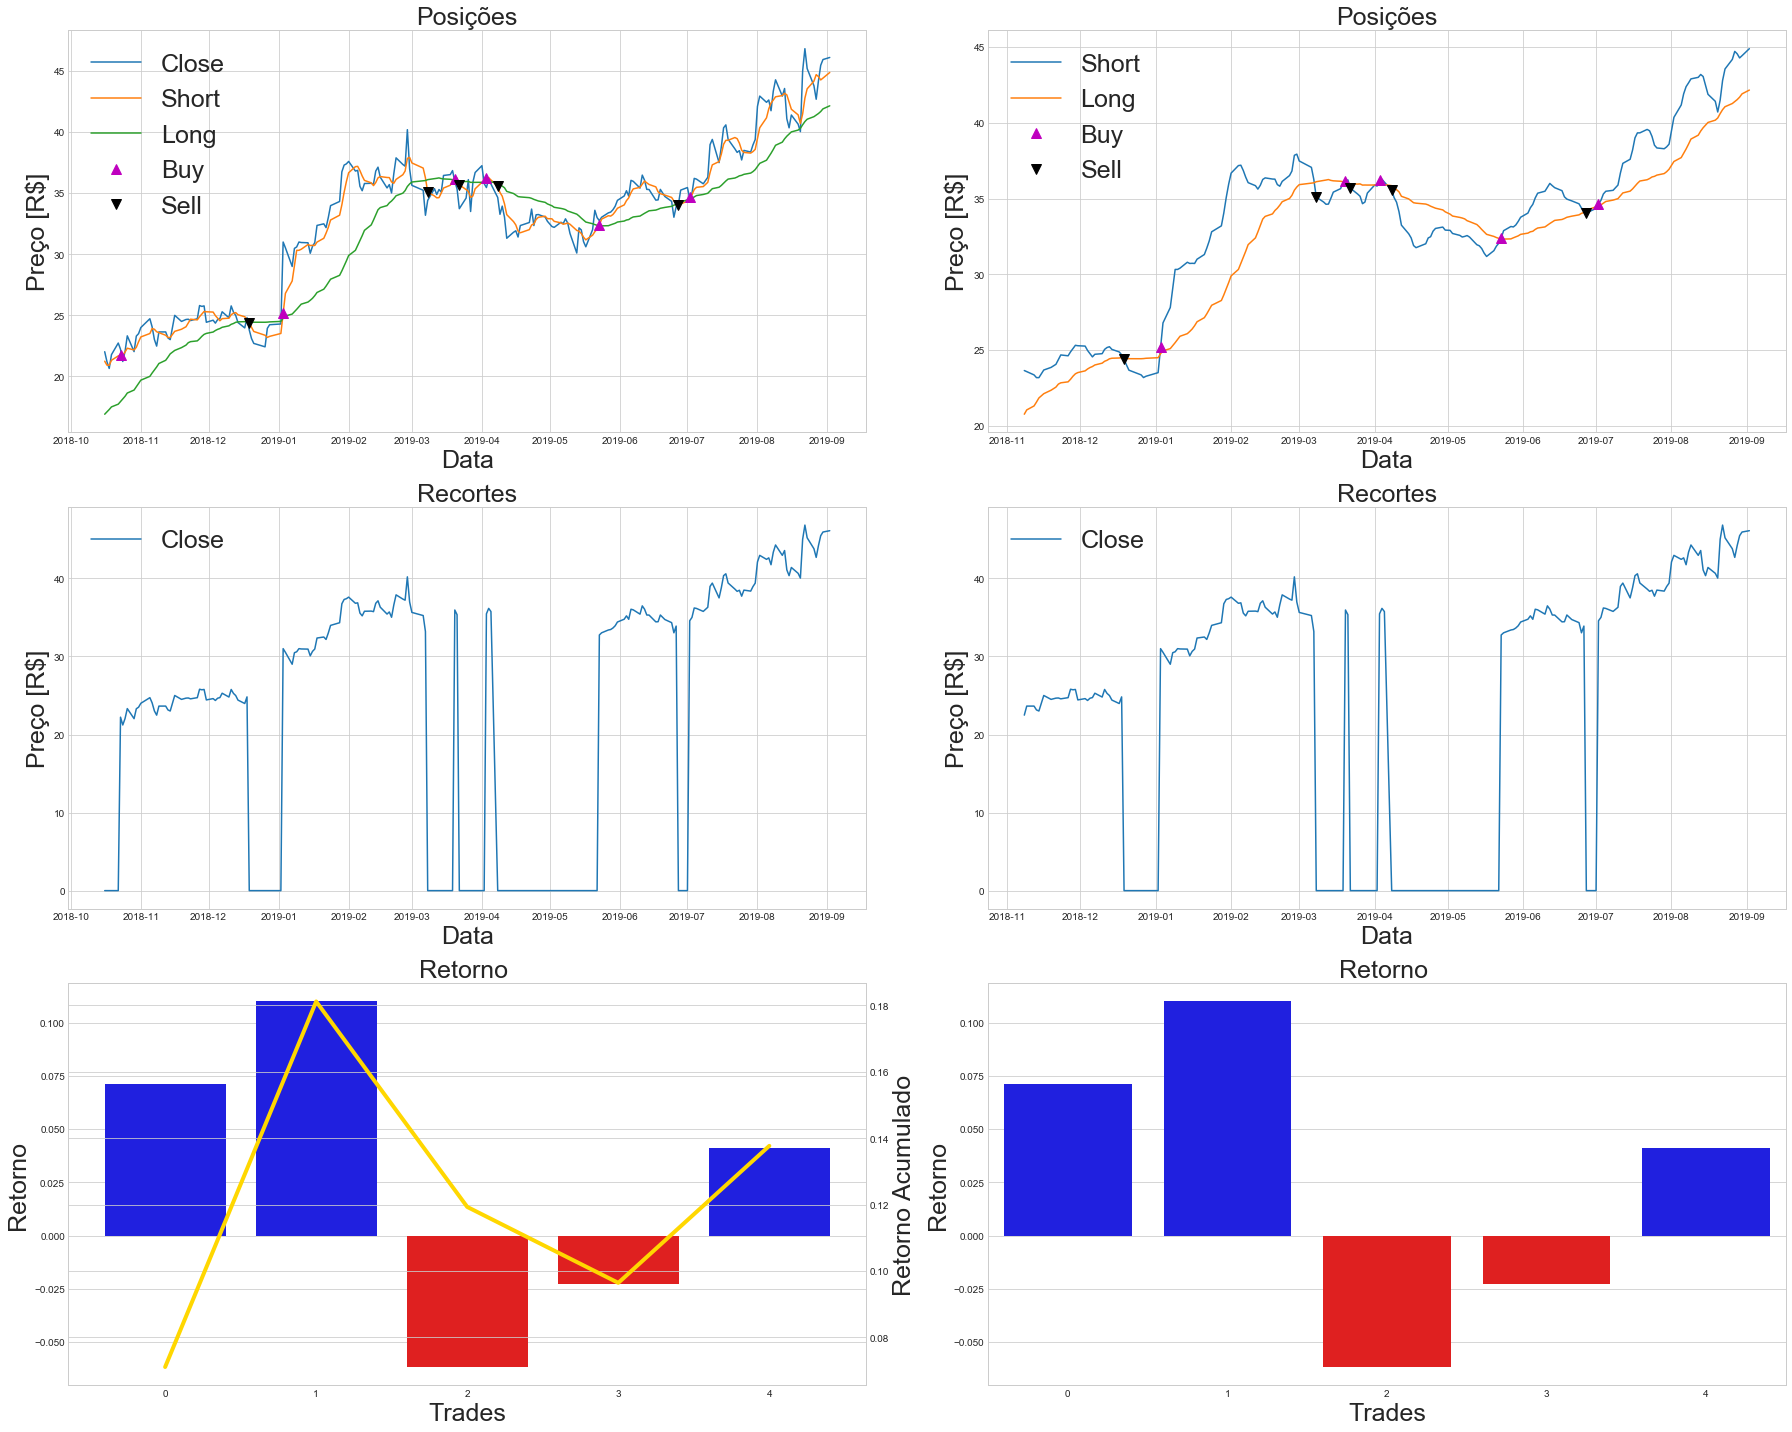

In [9]:
import seaborn as sns

def sumper(per):
    persum=100*(np.exp(np.log1p(per/100).cumsum())-1)
    return persum

trades['Close_recorte']=trades['Close']*trades['signal']
%matplotlib inline   
fig = plt.subplots(figsize=(25,20))
plt.style.use('seaborn-whitegrid')

ax1 = plt.subplot(321)
ax1.plot(trades['Close'], label='Close')
ax1.plot(trades['short'], label='Short')
ax1.plot(trades['long'],label='Long')

ax1.plot(trades.loc[trades.positions == 1.0].index, 
         trades.short[trades.positions == 1.0],
         '^', markersize=10, color='m',label='Buy')
ax1.plot(trades.loc[trades.positions == -1.0].index, 
         trades.short[trades.positions == -1.0],
         'v', markersize=10, color='k',label='Sell') 

ax1.set_ylabel("Preço [R$]",fontsize=25)
ax1.set_xlabel("Data",fontsize=25)
ax1.set_title("Posições",fontsize=25)
ax1.legend(loc='upper left',fontsize=25)

ax2 = plt.subplot(322)
#ax2.plot(trades['Close'][-200:], label='Close')
ax2.plot(trades['short'][-200:], label='Short')
ax2.plot(trades['long'][-200:],label='Long')
ax2.set_ylabel("Preço [R$]",fontsize=25)
ax2.set_xlabel("Data",fontsize=25)
ax2.set_title("Posições",fontsize=25)
ax2.plot(trades[-200:].loc[trades[-200:].positions == 1.0].index, 
         trades[-200:].short[trades[-200:].positions == 1.0],
         '^', markersize=10, color='m',label='Buy')
ax2.plot(trades[-200:].loc[trades[-200:].positions == -1.0].index, 
         trades[-200:].short[trades[-200:].positions == -1.0],
         'v', markersize=10, color='k',label='Sell') 
ax2.legend(loc='upper left',fontsize=25)

ax3 = plt.subplot(323)
ax3.plot(trades['Close_recorte'], label='Close')
ax3.set_ylabel("Preço [R$]",fontsize=25)
ax3.set_xlabel("Data",fontsize=25)
ax3.set_title("Recortes",fontsize=25)
ax3.legend(loc='upper left',fontsize=25)

ax4 = plt.subplot(324)
ax4.plot(trades['Close_recorte'][-200:], label='Close')
ax4.set_ylabel("Preço [R$]",fontsize=25)
ax4.set_xlabel("Data",fontsize=25)
ax4.set_title("Recortes",fontsize=25)
ax4.legend(loc='upper left',fontsize=25)

ax5 = plt.subplot(325)
pos_buy=np.where(trades['positions']==1)
pos_sell=trades['positions']==-1
days_buy=trades['Close'][trades['positions']==1].index
days_buy=days_buy[:-1]
days_sell=trades['Close'][trades['positions']==-1].index
distance=days_sell-days_buy
buy_trade=[]
for i in range(len(days_buy)):
    values_2=trades['Close'][trades['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades['Close'][trades['Close'].index==days_buy[i]].values[0]
    buy_trade.append((values_2-values_1)/values_1)

values = np.array(buy_trade)
values1=buy_trade

idx = np.array(list(range(len(buy_trade)))) 
clrs = ['red' if (x < 0) else 'blue' for x in values]
sns.barplot(x=idx, y=values, palette=clrs) 

plt.ylabel('Retorno',fontsize=25)
plt.xlabel('Trades',fontsize=25)

ax52 = ax5.twinx()

ax52.plot(sumper(values),'gold',linewidth=4)

plt.ylabel('Retorno Acumulado',fontsize=25)
plt.xlabel('Trades',fontsize=25)
plt.title('Retorno ',fontsize=25)


ax6 = plt.subplot(326)
pos_buy=np.where(trades['positions']==1)
pos_sell=trades['positions']==-1
days_buy=trades['Close'][trades['positions']==1].index
days_buy=days_buy[:-1]
days_sell=trades['Close'][trades['positions']==-1].index
distance=days_sell-days_buy
buy_trade=[]
for i in range(len(days_buy)):
    values_2=trades['Close'][trades['Close'].index==(days_buy[i]+distance[i])].values[0]
    values_1=trades['Close'][trades['Close'].index==days_buy[i]].values[0]
    buy_trade.append((values_2-values_1)/values_1)
values = np.array(buy_trade[-6:])   
idx = np.array(list(range(len(values)))) 
clrs = ['red' if (x < 0) else 'blue' for x in values]
sns.barplot(x=idx, y=values, palette=clrs) 


plt.ylabel('Retorno',fontsize=25)
plt.xlabel('Trades',fontsize=25)
plt.title('Retorno ',fontsize=25)
plt.tight_layout() 


In [ ]:
sharpe5=(df['r5'].mean()-5/(12*100))/df['r5'].std()
sharpe2=(df['r2'].mean()-5/(12*100))/df['r2'].std()
print("Indice Sharpe de r5 = %.2f e Indice Shape de r2 = %.2f" % (sharpe5, sharpe2))

Questão 2: Implemente uma estratégia de trade automático baseado em duas médias móveis anterior, adicionando à aplicação o RSI ou MACD. Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.

Questão 3: Escolha uma estratégia de trade automático de contra tendência, apresentada na Referência Palex . Verifique o desempenho quanto ao Índice Sharpe nos mesmos ativos e tempo da questão 1.

Questão 4: Compare os resultados das três estrategias de trades, quanto: a) Retorno de Capital, b) Número de Trades, c) Taxa de Acertos, d) Fator de Lucro, e) Índice Sharpe e o f) retorno dos ativos avaliados na condição buy&hold.